# Myranda Swartzwelter Week 7 Homework DSC-530

In [4]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import brfss
from scipy import stats

import thinkstats2
import thinkplot
import first

**7-1** Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

First, recreate covariance, Pearson's Correlation and Spearman's Correlation functions used in chapter:

In [13]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [14]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [15]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [34]:
# get data from dataset
live, firsts, others = first.MakeFrames()

#get rid of NAs and define variables
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
ages = live.agepreg
weights = live.totalwgt_lb


Make a scatterplot of birthweight vs age

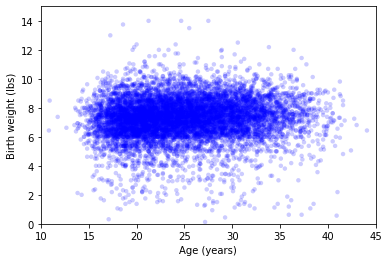

In [35]:
thinkplot.Scatter(ages, weights, s=20)
thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)

Plot percentiles of birth weight versus mother’s age.

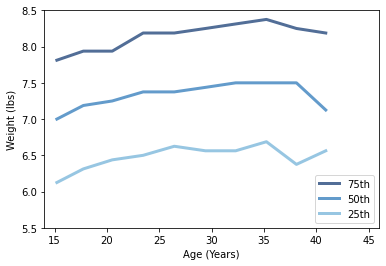

In [57]:
bins = np.arange(10, 50, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

  
mean_ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_ages, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Age (Years)',
                 ylabel='Weight (lbs)',
                 axis=[14, 46, 5.5, 8.5],
                 legend=True)

In [ ]:
#get Pearson's coefficient from written functions and check against  numpy function
pearsons_cor = Corr(ages, weights)
pearsons_cor_numpy = np.corrcoef(ages, weights)

#get Spearman's coefficient from written functions and check against scipy function
spearmans_cor = SpearmanCorr(ages, weights)
spearmans_cor_scipy = stats.spearmanr(ages, weights)


print('Pearsons Coefficient from frunction:', pearsons_cor)
print('Pearsons Coefficient from numpy ', pearsons_cor_numpy)
print('Spearmans Coefficient from function: ', spearmans_cor)
print('Spearmans Coefficient from scipy: ', spearmans_cor_scipy)

#confirm they match, they do!

Looking at the scartter plot, line graph, and correlation coefficients, it appears that there is a weak relationsbip beween the variables.
There is not a large difference between the Spearman and Pearson correlation coefficients indicates potential outliers or non-linear relationship.

**8-1** In this chapter we used  𝑥¯  and median to estimate µ, and found that  𝑥¯  yields lower MSE. Also, we used  𝑆2  and  𝑆2𝑛−1  to estimate σ, and found that  𝑆2  is biased and  𝑆2𝑛−1  unbiased. Run similar experiments to see if  𝑥¯  and median are biased estimates of µ. Also check whether  𝑆2  or  𝑆2𝑛−1  yields a lower MSE.

In [82]:
import random

#get functions from previous calculations:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


#estimate for MSE
def Estimate1(n=7, iters=10000):
    """Evaluates MSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
    
Estimate1(iters=100)
Estimate1(iters=1000)
Estimate1(iters=10000)
Estimate1(iters=100000)
#As the number of iterations increases, the mean error for both the xbar and median go to zero, so neither is biased.

Experiment 1
mean error xbar 0.16561956972776198
mean error median 0.2341289886819642
Experiment 1
mean error xbar -0.013589568401305057
mean error median -0.018757792097928366
Experiment 1
mean error xbar 0.007707119911097311
mean error median 0.011981146568491492
Experiment 1
mean error xbar 0.0016973074259632758
mean error median 0.003169692980325869


In [89]:
#MSE for biased / unbiased
def Estimate2(n=7, iters=10000):
    """Evaluates MSE for biased and unbiased estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    biased_list = []
    unbiased_list = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        biased_list.append(biased)
        unbiased_list.append(unbiased)
        
    mse_biased = MeanError(biased_list, sigma**2)
    mse_unbiased = MeanError(unbiased_list, sigma**2)
    
    print('Experiment 2')
    print('MSE Biased', mse_biased)
    print('MSE Unbiased', mse_unbiased)

#100 iterations
Estimate2(iters=100)

#1000 iterations
Estimate2(iters=1000)

#10000 iterations
Estimate2(iters=10000)

#1000000 iterations
Estimate2(iters=100000)



Experiment 2
MSE Biased -0.1160720030747388
MSE Unbiased 0.031249329746138095
Experiment 2
MSE Biased -0.12659781425376954
MSE Unbiased 0.018969216703935546
Experiment 2
MSE Biased -0.13966141291512327
MSE Unbiased 0.0037283515990228617
Experiment 2
MSE Biased -0.14257451170512905
MSE Unbiased 0.0003297363440161159


The mean error for  𝑆2  is non-zero, which suggests that it is biased. The mean error for  𝑆2𝑛−1  is close to zero, and gets even smaller if we increase iters.

**8-2**  Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 0.8778213717953087
confidence interval (1.2803944666517124, 3.813705313013093)
standard error 0.2973879553611361
confidence interval (1.6217568363959516, 2.580930808082492)
standard error 0.21323192636726446
confidence interval (1.7040061235807618, 2.410052854090048)
standard error 0.08583304960925724
confidence interval (1.8658095661907437, 2.141163352170933)
standard error 0.06268351527466512
confidence interval (1.9003845091469114, 2.1090462268280064)


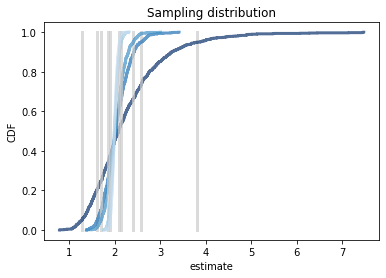

In [134]:
#create function to simulate the experiment
def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        estimates.append(L)
        
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

   #  plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr
n_list = [10,50,100,500,1000]
errors = []
for n in n_list:
        error = SimulateSample(lam=2,n=n, iters=1000)
        errors.append(error)

Text(0.5, 1.0, 'Standard error v n Size')

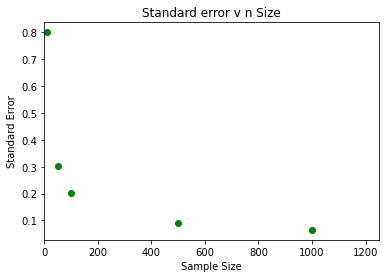

In [133]:
matplotlib.pyplot.scatter(n_list, errors, color='green', marker='o')
matplotlib.pyplot.xlim(0,1250)
matplotlib.pyplot.xlabel("Sample Size")
matplotlib.pyplot.ylabel('Standard Error')
matplotlib.pyplot.title('Standard error v n Size')

As n increases, standard error and confidence intervals decrease